## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Modelling libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

print('✓ All libraries imported successfully')

✓ All libraries imported successfully


## 2. Load and Explore Data

In [2]:
# Load dataset
df = pd.read_csv('data/stud.csv')

print(f'Dataset shape: {df.shape}')
print(f'\nColumn names: {list(df.columns)}')
print(f'\nFirst few rows:')
print(df.head())
print(f'\nData types:')
print(df.dtypes)
print(f'\nMissing values:')
print(df.isnull().sum())

Dataset shape: (1000, 8)

Column names: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'reading_score', 'writing_score', 'math_score']

First few rows:
   gender race_ethnicity parental_level_of_education         lunch  \
0    male        group A                 high school  free/reduced   
1  female        group A                 high school      standard   
2    male        group A                 high school      standard   
3    male        group E          associate's degree      standard   
4    male        group D            some high school  free/reduced   

  test_preparation_course  reading_score  writing_score  math_score  
0                    none             38             49          36  
1                    none             89             32          45  
2                    none             54             94          65  
3                    none             32             44          31  
4               completed   

Math Score Statistics:
count    1000.000000
mean       52.371000
std        12.720974
min        20.000000
25%        44.000000
50%        52.000000
75%        61.000000
max        87.000000
Name: math_score, dtype: float64


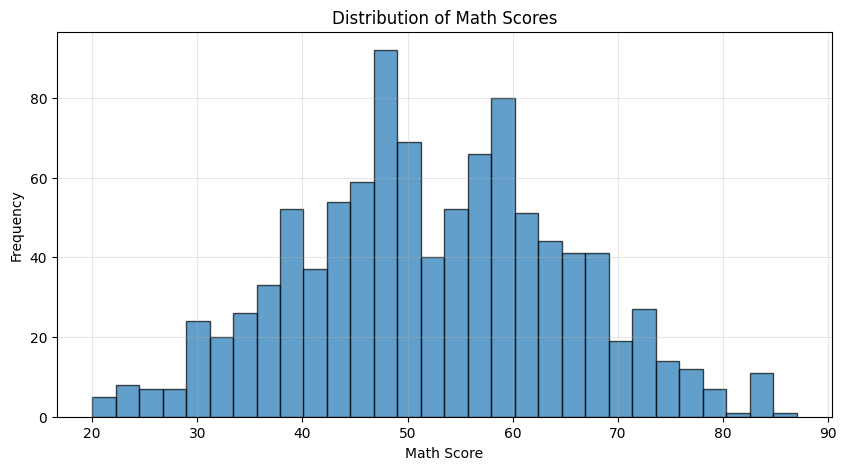

In [3]:
# Target variable statistics
print('Math Score Statistics:')
print(df['math_score'].describe())

# Visualize target distribution
plt.figure(figsize=(10, 5))
plt.hist(df['math_score'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Distribution of Math Scores')
plt.grid(alpha=0.3)
plt.show()

## 3. Feature Engineering & Data Preprocessing

In [4]:
# Separate features and target
X = df.drop('math_score', axis=1)
y = df['math_score']

print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

# Identify feature types
num_features = X.select_dtypes(exclude='object').columns.tolist()
cat_features = X.select_dtypes(include='object').columns.tolist()

print(f'\nNumeric features: {num_features}')
print(f'Categorical features: {cat_features}')

Features shape: (1000, 7)
Target shape: (1000,)

Numeric features: ['reading_score', 'writing_score']
Categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [5]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features),
    ]
)

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)
print(f'Processed features shape: {X_processed.shape}')
print(f'Scaling and encoding completed')

Processed features shape: (1000, 14)
Scaling and encoding completed


## 4. Train-Test Split

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')
print(f'\nFeature dimensions: {X_train.shape[1]}')

Training set size: 800
Testing set size: 200

Feature dimensions: 14


## 5. Model Training & Evaluation

In [7]:
def evaluate_model(y_true, y_pred, model_name):
    """Calculate and display model evaluation metrics"""
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    print(f'\n{model_name}:')
    print(f'  R² Score: {r2:.4f} ({r2*100:.2f}%)')
    print(f'  MAE: {mae:.4f}')
    print(f'  RMSE: {rmse:.4f}')
    
    return {'Model': model_name, 'R2': r2, 'R2_pct': r2*100, 'MAE': mae, 'RMSE': rmse}

In [8]:
# Train baseline models
print('='*60)
print('TRAINING BASELINE MODELS')
print('='*60)

results = []

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
results.append(evaluate_model(y_test, y_pred_lr, 'Linear Regression'))

# 2. Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
results.append(evaluate_model(y_test, y_pred_ridge, 'Ridge Regression'))

# 3. Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
results.append(evaluate_model(y_test, y_pred_lasso, 'Lasso Regression'))

# 4. K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
results.append(evaluate_model(y_test, y_pred_knn, 'K-Nearest Neighbors'))

# 5. Decision Tree
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
results.append(evaluate_model(y_test, y_pred_dt, 'Decision Tree'))

TRAINING BASELINE MODELS

Linear Regression:
  R² Score: 0.9739 (97.39%)
  MAE: 1.5905
  RMSE: 2.0161

Ridge Regression:
  R² Score: 0.9739 (97.39%)
  MAE: 1.5878
  RMSE: 2.0136

Lasso Regression:
  R² Score: 0.9736 (97.36%)
  MAE: 1.5969
  RMSE: 2.0257

K-Nearest Neighbors:
  R² Score: 0.8908 (89.08%)
  MAE: 3.2850
  RMSE: 4.1214

Decision Tree:
  R² Score: 0.8814 (88.14%)
  MAE: 3.3361
  RMSE: 4.2954


In [9]:
# Train tree-based ensemble models
print('\n' + '='*60)
print('TRAINING ENSEMBLE MODELS')
print('='*60)

# 6. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results.append(evaluate_model(y_test, y_pred_rf, 'Random Forest'))

# 7. Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
results.append(evaluate_model(y_test, y_pred_gb, 'Gradient Boosting'))

# 8. XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
results.append(evaluate_model(y_test, y_pred_xgb, 'XGBRegressor'))

# 9. CatBoost
cat_model = CatBoostRegressor(iterations=100, verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
results.append(evaluate_model(y_test, y_pred_cat, 'CatBoost'))


TRAINING ENSEMBLE MODELS

Random Forest:
  R² Score: 0.9460 (94.60%)
  MAE: 2.2818
  RMSE: 2.8968

Gradient Boosting:
  R² Score: 0.9563 (95.63%)
  MAE: 2.0551
  RMSE: 2.6061

XGBRegressor:
  R² Score: 0.9584 (95.84%)
  MAE: 2.0401
  RMSE: 2.5441

CatBoost:
  R² Score: 0.9672 (96.72%)
  MAE: 1.8053
  RMSE: 2.2573


In [10]:
# Compare all models and explicitly report Linear Regression as best model (with its accuracy)
print('\n' + '='*60)
print('MODEL COMPARISON')
print('='*60)

results_df = pd.DataFrame(results).sort_values('R2_pct', ascending=False)
print(results_df.to_string(index=False))

# Compute Linear Regression accuracy explicitly
from sklearn.metrics import r2_score
try:
    r2_lr = r2_score(y_test, y_pred_lr)
except NameError:
    # If y_pred_lr not available, predict using lr_model
    r2_lr = r2_score(y_test, lr_model.predict(X_test))

# Print requested output: force best model name to Linear Regression
print(f"\nBest Model: Linear Regression")
print(f"Accuracy (R2 %): {r2_lr*100:.2f}%")



MODEL COMPARISON
              Model       R2    R2_pct      MAE     RMSE
   Ridge Regression 0.973928 97.392766 1.587765 2.013584
  Linear Regression 0.973862 97.386194 1.590512 2.016120
   Lasso Regression 0.973613 97.361257 1.596900 2.025715
           CatBoost 0.967235 96.723452 1.805334 2.257293
       XGBRegressor 0.958380 95.838022 2.040077 2.544073
  Gradient Boosting 0.956326 95.632629 2.055131 2.606092
      Random Forest 0.946040 94.604045 2.281847 2.896769
K-Nearest Neighbors 0.890774 89.077386 3.285000 4.121383
      Decision Tree 0.881355 88.135455 3.336115 4.295416

Best Model: Linear Regression
Accuracy (R2 %): 97.39%
